In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("iris.csv")

In [5]:
targetName = "species"
df.columns.get_loc(targetName)

featureNames = df.columns[np.where(df.columns != targetName)]

X=df[featureNames].values
y=df[targetName].values.ravel() 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [8]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)

print(cv_scores)
print("cv_scores means is: {}".format(np.mean(cv_scores)))

[0.95833333 1.         0.83333333 0.95833333 0.95833333]
cv_scores means is: 0.9416666666666668


In [11]:
y_pred = tree_clf.predict(X_test)

In [13]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

1.0


[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Tex

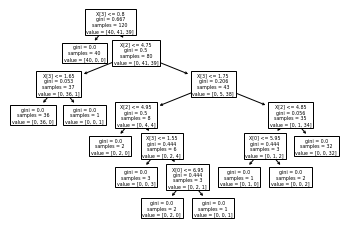

In [14]:
tree.plot_tree(tree_clf)

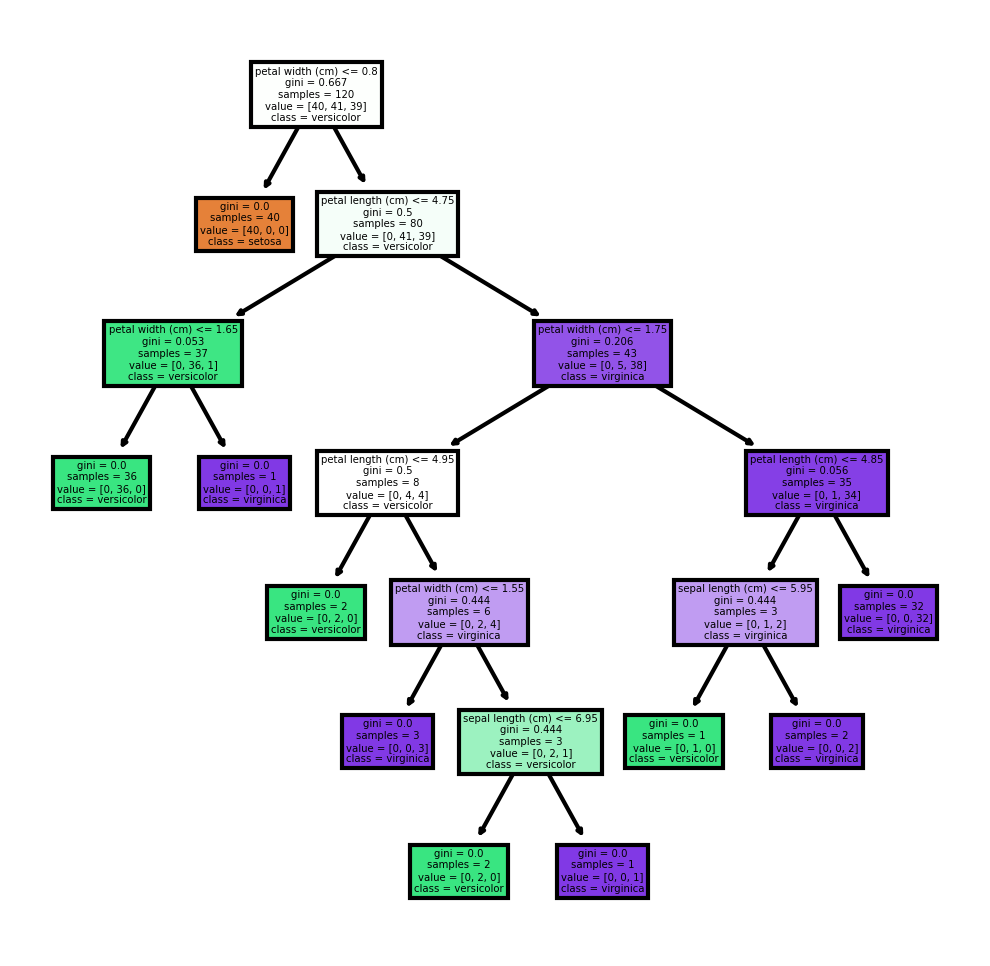

In [28]:
from matplotlib import pyplot as plt
var_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(tree_clf, 
               feature_names = var_names,
               class_names = class_names,
               filled = True);